#####⭐ 개요
##### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
##### 심혈관 질환(CVD)은 전 세계 사망 원인 1위이며, 매년 전 세계 사망자의 31%를 차지하는 약 1,790만 명의 목숨을 앗아갑니다. 5CVD 사망자 중 4명은 심장마비와 뇌졸중으로 인한 것이며, 이 중 3분의 1은 70세 미만의 사람들에게서 조기에 발생합니다. 심부전은 CVD에 의해 발생하는 일반적인 사건이며, 이 데이터 세트에는 가능한 심장 질환을 예측하는 데 사용할 수 있는 11가지 기능이 포함되어 있습니다.

##### ⭐ 분석의 필요성

##### People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##### 심혈관 질환이 있거나 심혈관 위험이 높은 사람(고혈압, 당뇨병, 고지혈증 또는 이미 확립된 질병과 같은 하나 이상의 위험 요소가 있기 때문에)은 기계 학습 모델이 큰 도움이 될 수 있는 조기 발견 및 관리가 필요합니다.

##### ⭐ 변수 정보
##### 😊Age: age of the patient [years]
##### 👱🏻‍♀️Sex: sex of the patient [M: Male, F: Female]
##### 🫀ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
##### 🆎RestingBP: resting blood pressure [mm Hg]
##### 💉Cholesterol: serum cholesterol [mm/dl]
##### 🧪FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
##### 📊RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
##### 🫀MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
##### 🎾ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
##### 📈ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
##### 🫀HeartDisease: output class [1: heart disease, 0: Normal]


##### ⭐ 데이터 출처
##### https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# ⭐ 데이터 분석 전 전처리 단계 진행.

## ✅ 1) 데이터셋 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heartfailure-dataset.csv')
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,Up,0


In [ ]:
df.shape

(918, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   ST_Slope        918 non-null    object
 10  HeartDisease    918 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 79.0+ KB


## ✅ 2) 타겟변수 생성

In [ ]:
df['HeartDisease'].dtype

dtype('int64')

In [ ]:
df['HeartDisease'].isnull().sum()

0

In [ ]:
df['HeartDisease'].value_counts(dropna=False)

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [ ]:
df['HeartDisease'].value_counts(dropna=False, normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

## ✅ 3) 기타 변수 데이터 처리

In [ ]:
cols = ['Age','RestingBP','Cholesterol', 'MaxHR']
df[cols].dtypes

Age            int64
RestingBP      int64
Cholesterol    int64
MaxHR          int64
dtype: object

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df[cols].describe()

,Age,RestingBP,Cholesterol,MaxHR
count,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81
std,9.43,18.51,109.38,25.46
min,28.00,0.00,0.00,60.00
25%,47.00,120.00,173.25,120.00
50%,54.00,130.00,223.00,138.00
75%,60.00,140.00,267.00,156.00
max,77.00,200.00,603.00,202.00


In [ ]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [ ]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})

In [ ]:
cols1 = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df[cols1].isnull().sum()

Sex               0
ChestPainType     0
FastingBS         0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [ ]:
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,Up,0


## ✅ 4) 결측값 50% 초과 변수 제거

In [ ]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

## ✅ 5) 요약통계 및 도수분포표 점검

In [ ]:
cols = ['Age','RestingBP','Cholesterol', 'MaxHR']
df[cols].describe()

,Age,RestingBP,Cholesterol,MaxHR
count,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81
std,9.43,18.51,109.38,25.46
min,28.00,0.00,0.00,60.00
25%,47.00,120.00,173.25,120.00
50%,54.00,130.00,223.00,138.00
75%,60.00,140.00,267.00,156.00
max,77.00,200.00,603.00,202.00


In [ ]:
#정규분포 확인
#-3에서 3 사이일 시 정상분포로 봄
df[cols].skew()

Age           -0.20
RestingBP      0.18
Cholesterol   -0.61
MaxHR         -0.14
dtype: float64

In [ ]:
#첨도 확인
#-10에서 10 사이일 시 정상으로 봄
df[cols].kurtosis()

Age           -0.39
RestingBP      3.27
Cholesterol    0.12
MaxHR         -0.45
dtype: float64

## ✅ 6) 이상값 제거

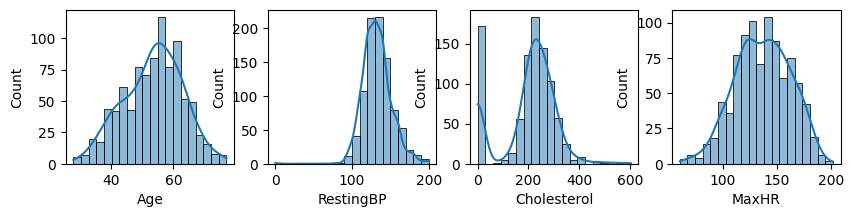

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(10, 2))
sns.histplot(ax=axes[0], data=df, x="Age", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="RestingBP", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="Cholesterol", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df, x="MaxHR", kde=True, bins=20)
plt.show()

<Axes: xlabel='MaxHR'>

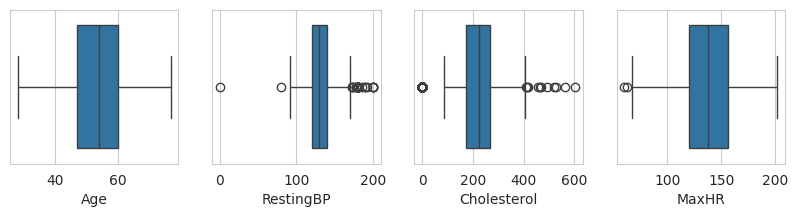

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 4, figsize=(10, 2))
sns.boxplot(ax=axes[0], x = 'Age', data = df)
sns.boxplot(ax=axes[1], x = 'RestingBP', data = df)
sns.boxplot(ax=axes[2], x = 'Cholesterol', data = df)
sns.boxplot(ax=axes[3], x = 'MaxHR', data = df)

In [ ]:
Q1 = df[['Age','RestingBP','Cholesterol', 'MaxHR']].quantile(0.25)
Q3 = df[['Age','RestingBP','Cholesterol', 'MaxHR']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age           13.00
RestingBP     20.00
Cholesterol   93.75
MaxHR         36.00
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

Age              8.00
RestingBP       60.00
Cholesterol   -108.00
MaxHR           12.00
dtype: float64


In [ ]:
print(Upper)

Age            99.00
RestingBP     200.00
Cholesterol   548.25
MaxHR         264.00
dtype: float64


In [ ]:
c1 = df['RestingBP'] <= 200
c2 = df['Cholesterol'] <= 548.25
c3 = df['Cholesterol'] >= -108.00
df1 = df[c1 & c2 & c3]
df1.shape

(916, 11)

## ✅ 7) 상관관계 검토

In [ ]:
cols = ['Age','RestingBP','Cholesterol', 'MaxHR']
round(df1[cols].corr(), 2)

,Age,RestingBP,Cholesterol,MaxHR
Age,1.00,0.26,-0.10,-0.38
RestingBP,0.26,1.00,0.11,-0.11
Cholesterol,-0.10,0.11,1.00,0.24
MaxHR,-0.38,-0.11,0.24,1.00


<Axes: >

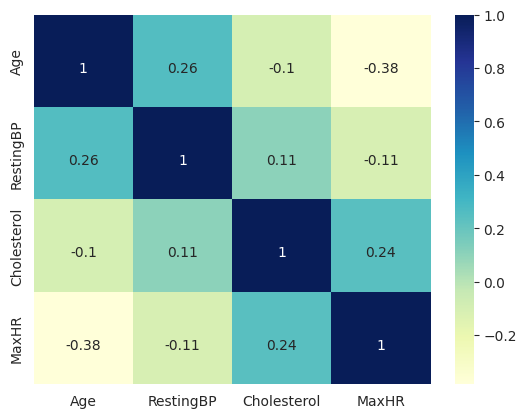

In [ ]:
import seaborn as sns
corr = df1[cols].corr()
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

## ✅ 8) 데이터 추가 전처리

In [ ]:
cols_ctg = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_pp = df1[cols_ctg]

for col in df_pp.columns:
    print ("")
    print ("---- %s ---" % col)
    print (df_pp[col].value_counts(dropna=False, normalize=True))


---- Sex ---
Sex
1   0.79
0   0.21
Name: proportion, dtype: float64

---- ChestPainType ---
ChestPainType
ASY   0.54
NAP   0.22
ATA   0.19
TA    0.05
Name: proportion, dtype: float64

---- FastingBS ---
FastingBS
0   0.77
1   0.23
Name: proportion, dtype: float64

---- RestingECG ---
RestingECG
Normal   0.60
LVH      0.20
ST       0.19
Name: proportion, dtype: float64

---- ExerciseAngina ---
ExerciseAngina
0   0.60
1   0.40
Name: proportion, dtype: float64

---- ST_Slope ---
ST_Slope
Flat   0.50
Up     0.43
Down   0.07
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df1['ChestPainType_encoded'] = OrdinalEncoder().fit_transform(df1['ChestPainType'].values.reshape(-1,1))
df1.groupby(['ChestPainType', 'ChestPainType_encoded']).size()

<ipython-input-39-bb4e2275b573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ChestPainType_encoded'] = OrdinalEncoder().fit_transform(df1['ChestPainType'].values.reshape(-1,1))


ChestPainType  ChestPainType_encoded
ASY            0.00                     495
ATA            1.00                     173
NAP            2.00                     202
TA             3.00                      46
dtype: int64

In [ ]:
df1['RestingECG_encoded'] = OrdinalEncoder().fit_transform(df1['RestingECG'].values.reshape(-1,1))
df1.groupby(['RestingECG', 'RestingECG_encoded']).size()

<ipython-input-40-90450b0a2d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['RestingECG_encoded'] = OrdinalEncoder().fit_transform(df1['RestingECG'].values.reshape(-1,1))


RestingECG  RestingECG_encoded
LVH         0.00                  187
Normal      1.00                  551
ST          2.00                  178
dtype: int64

In [ ]:
df1['ST_Slope_encoded'] = OrdinalEncoder().fit_transform(df1['ST_Slope'].values.reshape(-1,1))
df1.groupby(['ST_Slope', 'ST_Slope_encoded']).size()

<ipython-input-41-99e1f7ab85b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ST_Slope_encoded'] = OrdinalEncoder().fit_transform(df1['ST_Slope'].values.reshape(-1,1))


ST_Slope  ST_Slope_encoded
Down      0.00                 63
Flat      1.00                458
Up        2.00                395
dtype: int64

In [ ]:
df1.rename(columns={'Sex': 'Sex_encoded', 'FastingBS': 'FastingBS_encoded', 'ExerciseAngina' : 'ExerciseAngina_encoded'}, inplace=True)

<ipython-input-42-7335671898a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Sex': 'Sex_encoded', 'FastingBS': 'FastingBS_encoded', 'ExerciseAngina' : 'ExerciseAngina_encoded'}, inplace=True)


In [ ]:
df1.drop(['ChestPainType','RestingECG','ST_Slope'], axis=1, inplace=True)

<ipython-input-43-c2bb2aa5c3ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['ChestPainType','RestingECG','ST_Slope'], axis=1, inplace=True)


In [ ]:
list(df1.columns)

['Age',
 'Sex_encoded',
 'RestingBP',
 'Cholesterol',
 'FastingBS_encoded',
 'MaxHR',
 'ExerciseAngina_encoded',
 'HeartDisease',
 'ChestPainType_encoded',
 'RestingECG_encoded',
 'ST_Slope_encoded']

In [ ]:
df1.to_csv('/content/drive/MyDrive/heartfailure-dataset-preprocessed.csv', index=False)

## ✅ 9) 최종 전처리된 dataset 도출하기

# ⭐ 머신러닝 모델 학습 진행.

## 🖥️ 1. 로지스틱 회귀

In [ ]:
import pandas as pd
import numpy as np
df_lr = pd.read_csv('/content/drive/MyDrive/heartfailure-dataset-preprocessed.csv')
df_lr.head(7)

,Age,Sex_encoded,RestingBP,Cholesterol,FastingBS_encoded,MaxHR,ExerciseAngina_encoded,HeartDisease,ChestPainType_encoded,RestingECG_encoded,ST_Slope_encoded
0,40,1,140,289,0,172,0,0,1.00,1.00,2.00
1,49,0,160,180,0,156,0,1,2.00,1.00,1.00
2,37,1,130,283,0,98,0,0,1.00,2.00,2.00
3,48,0,138,214,0,108,1,1,0.00,1.00,1.00
4,54,1,150,195,0,122,0,0,2.00,1.00,2.00
5,39,1,120,339,0,170,0,0,2.00,1.00,2.00
6,45,0,130,237,0,170,0,0,1.00,1.00,2.00


In [ ]:
cols = ['ChestPainType_encoded', 'RestingECG_encoded', 'ST_Slope_encoded']

In [ ]:
df_lr2 = pd.get_dummies(df_lr, columns=cols)

In [ ]:
df_lr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        916 non-null    int64
 1   Sex_encoded                916 non-null    int64
 2   RestingBP                  916 non-null    int64
 3   Cholesterol                916 non-null    int64
 4   FastingBS_encoded          916 non-null    int64
 5   MaxHR                      916 non-null    int64
 6   ExerciseAngina_encoded     916 non-null    int64
 7   HeartDisease               916 non-null    int64
 8   ChestPainType_encoded_0.0  916 non-null    bool 
 9   ChestPainType_encoded_1.0  916 non-null    bool 
 10  ChestPainType_encoded_2.0  916 non-null    bool 
 11  ChestPainType_encoded_3.0  916 non-null    bool 
 12  RestingECG_encoded_0.0     916 non-null    bool 
 13  RestingECG_encoded_1.0     916 non-null    bool 
 14  RestingECG_encoded_2.0    

In [ ]:
# 기준 더미 변수
cols2 = ['ChestPainType_encoded_0.0','RestingECG_encoded_0.0','ST_Slope_encoded_0.0']
# ChestPainType : ASY, RestingECG : Normal, ST_Slope : Flat
df_lr2.drop(cols2, axis=1, inplace=True)
df_lr2.shape

(916, 15)

In [ ]:
list(df_lr2.columns)

['Age',
 'Sex_encoded',
 'RestingBP',
 'Cholesterol',
 'FastingBS_encoded',
 'MaxHR',
 'ExerciseAngina_encoded',
 'HeartDisease',
 'ChestPainType_encoded_1.0',
 'ChestPainType_encoded_2.0',
 'ChestPainType_encoded_3.0',
 'RestingECG_encoded_1.0',
 'RestingECG_encoded_2.0',
 'ST_Slope_encoded_1.0',
 'ST_Slope_encoded_2.0']

In [ ]:
df_lr2.to_csv('/content/drive/MyDrive/heartfailure-dataset-dummy.csv', index=False)

In [ ]:
df_lr_dummy = pd.read_csv('/content/drive/MyDrive/heartfailure-dataset-dummy.csv')
df_lr_dummy.shape

(916, 15)

In [ ]:
df_lr_dummy.dtypes

Age                          int64
Sex_encoded                  int64
RestingBP                    int64
Cholesterol                  int64
FastingBS_encoded            int64
MaxHR                        int64
ExerciseAngina_encoded       int64
HeartDisease                 int64
ChestPainType_encoded_1.0     bool
ChestPainType_encoded_2.0     bool
ChestPainType_encoded_3.0     bool
RestingECG_encoded_1.0        bool
RestingECG_encoded_2.0        bool
ST_Slope_encoded_1.0          bool
ST_Slope_encoded_2.0          bool
dtype: object

In [ ]:
data = df_lr_dummy.drop(['HeartDisease'], axis=1)
target = df_lr_dummy['HeartDisease']
print(target.value_counts())

HeartDisease
1    507
0    409
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.9, random_state=51)
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=329, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (431, 14)
X_test shape: (432, 14)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.86775
Logreg Test set score:0.85185


In [ ]:
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# Grid Search
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.85384
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.85185


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기
feature_names = list(data.columns)
df_lr_ = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names, columns=['coef'])
df_lr_coef = df_lr_.sort_values(by='coef', ascending=True)
df_lr_coef

,coef
ChestPainType_encoded_2.0,-1.99
ChestPainType_encoded_1.0,-1.78
ST_Slope_encoded_2.0,-1.74
ChestPainType_encoded_3.0,-0.61
RestingECG_encoded_1.0,-0.58
RestingECG_encoded_2.0,-0.57
Cholesterol,-0.01
MaxHR,-0.00
RestingBP,0.01
Age,0.02


In [ ]:
feature_names = list(data.columns)
df_lr_ = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names, columns=['Odds_ratio'])
df_lr_coef = df_lr_.sort_values(by='Odds_ratio', ascending=False)
df_lr_coef

,Odds_ratio
FastingBS_encoded,3.98
ST_Slope_encoded_1.0,3.59
Sex_encoded,2.89
ExerciseAngina_encoded,2.28
Age,1.02
RestingBP,1.01
MaxHR,1.00
Cholesterol,0.99
RestingECG_encoded_2.0,0.56
RestingECG_encoded_1.0,0.56


<ipython-input-64-542a0b83ecd6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_lr_coef.index, x="Odds_ratio", data=df_lr_coef, palette=colors)
<ipython-input-64-542a0b83ecd6>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(y=df_lr_coef.index, x="Odds_ratio", data=df_lr_coef, palette=colors)


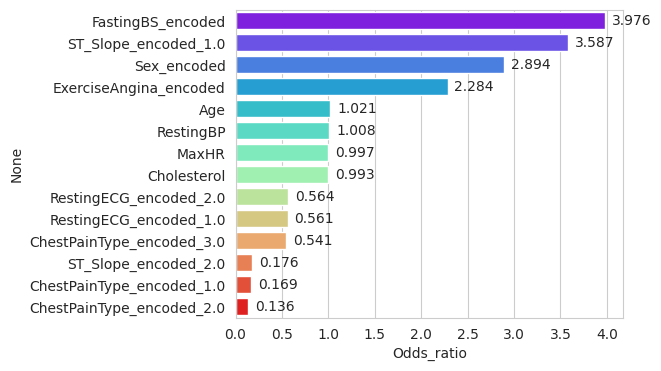

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline

num_bars = len(df_lr_coef)
colors = cm.rainbow(np.linspace(0, 1, num_bars))

plt.figure(figsize=(5, 4))
ax = sns.barplot(y=df_lr_coef.index, x="Odds_ratio", data=df_lr_coef, palette=colors)

for p in ax.patches:
    ax.annotate(f"{p.get_width():.3f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', va='center')

plt.show()

## 🖥️ 2. 신경망

In [ ]:
df_nn = pd.read_csv('/content/drive/MyDrive/heartfailure-dataset-dummy.csv')
df_nn.shape

(916, 15)

In [ ]:
data = df_nn.drop(['HeartDisease'], axis=1)
target = df_nn['HeartDisease']

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.9, random_state=51)
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=329, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (431, 14)
X_test shape: (432, 14)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.84223
Neural Network Test set score:0.82176


In [ ]:
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.87014
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 1, 'solver': 'adam'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.83796


## 🖥️ 3. KNN

In [ ]:
df_knn = pd.read_csv('/content/drive/MyDrive/heartfailure-dataset-dummy.csv')
df_knn.shape

(916, 15)

In [ ]:
data = df_knn.drop(['HeartDisease'], axis=1)
target = df_knn['HeartDisease']

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.9, random_state=51)
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=329, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (431, 14)
X_test shape: (432, 14)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print ("KNN Training set score:{:.5f}".format(clf_knn.score(X_train, y_train)))
print ("KNN Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

KNN Training set score:0.82135
KNN Test set score:0.67130


In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(3, 31)}

grid_knn = GridSearchCV(clf_knn, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_knn.best_score_))
print("GridSearchCV best parameter:", (grid_knn.best_params_))

GridSearchCV max accuracy:0.71452
GridSearchCV best parameter: {'n_neighbors': 19}


In [ ]:
best_clf = grid_knn.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.70602
